In [1]:
# Importing the libraries
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore') # remove warnings from jupyter notebook

In [3]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/Mandar/Downloads/appdata10.csv')

In [4]:
# Viewing the data
dataset.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
# Descriptive Statistics of Numerical Variables
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Feature Scaling
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

In [7]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [8]:
# Dropping unwanted columns
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [9]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


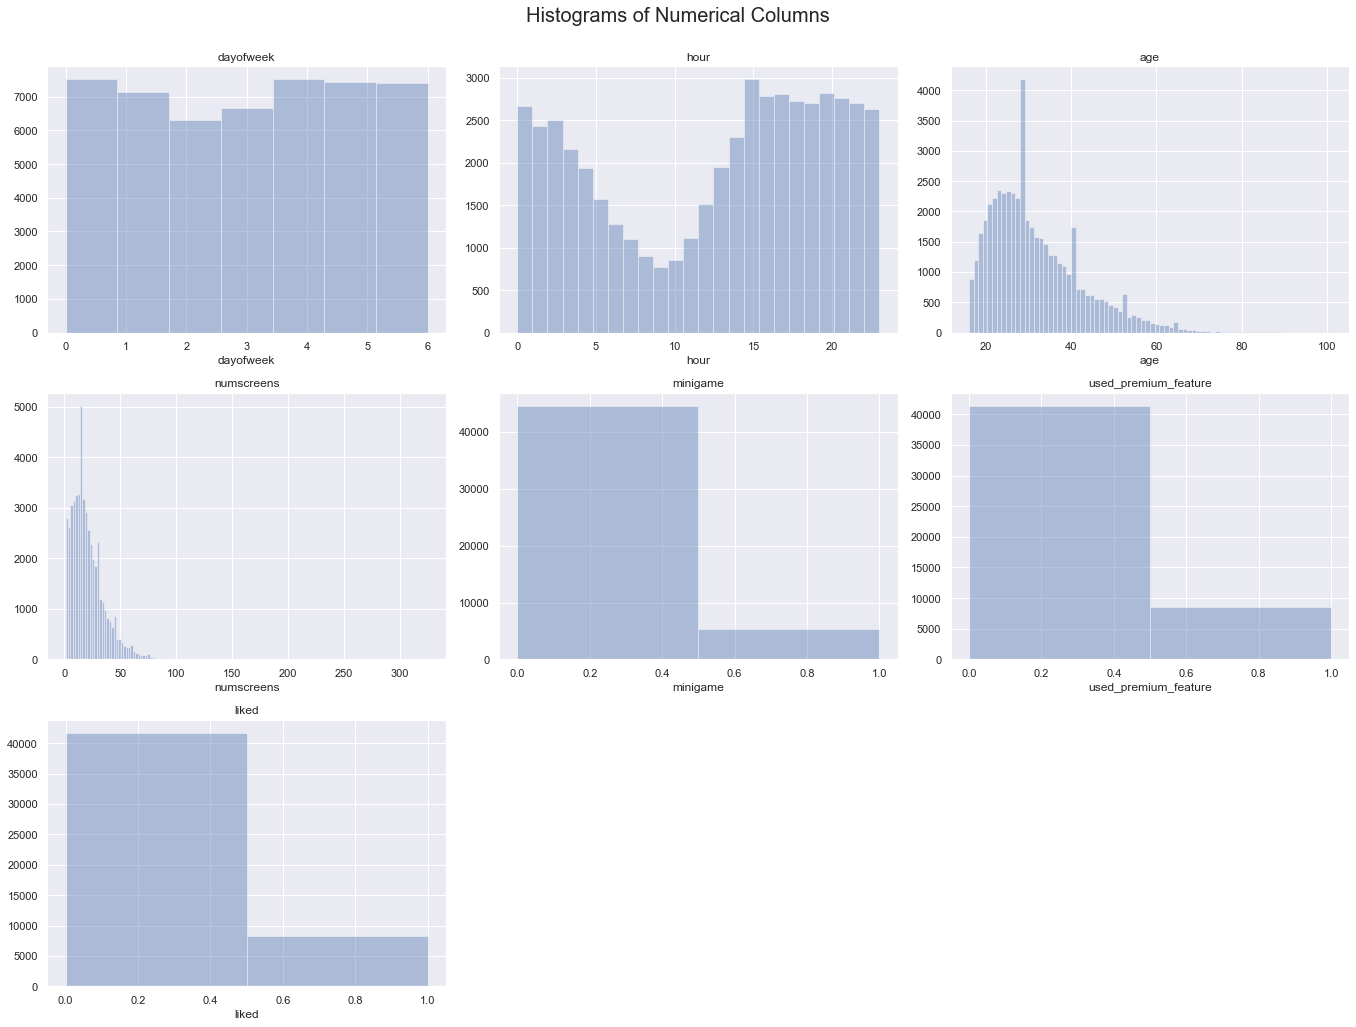

In [10]:
# Plotting Histograms
sns.set()
plt.figure(figsize=(19,15))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    sns.distplot(dataset2.iloc[:, i - 1], bins=vals, kde = False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

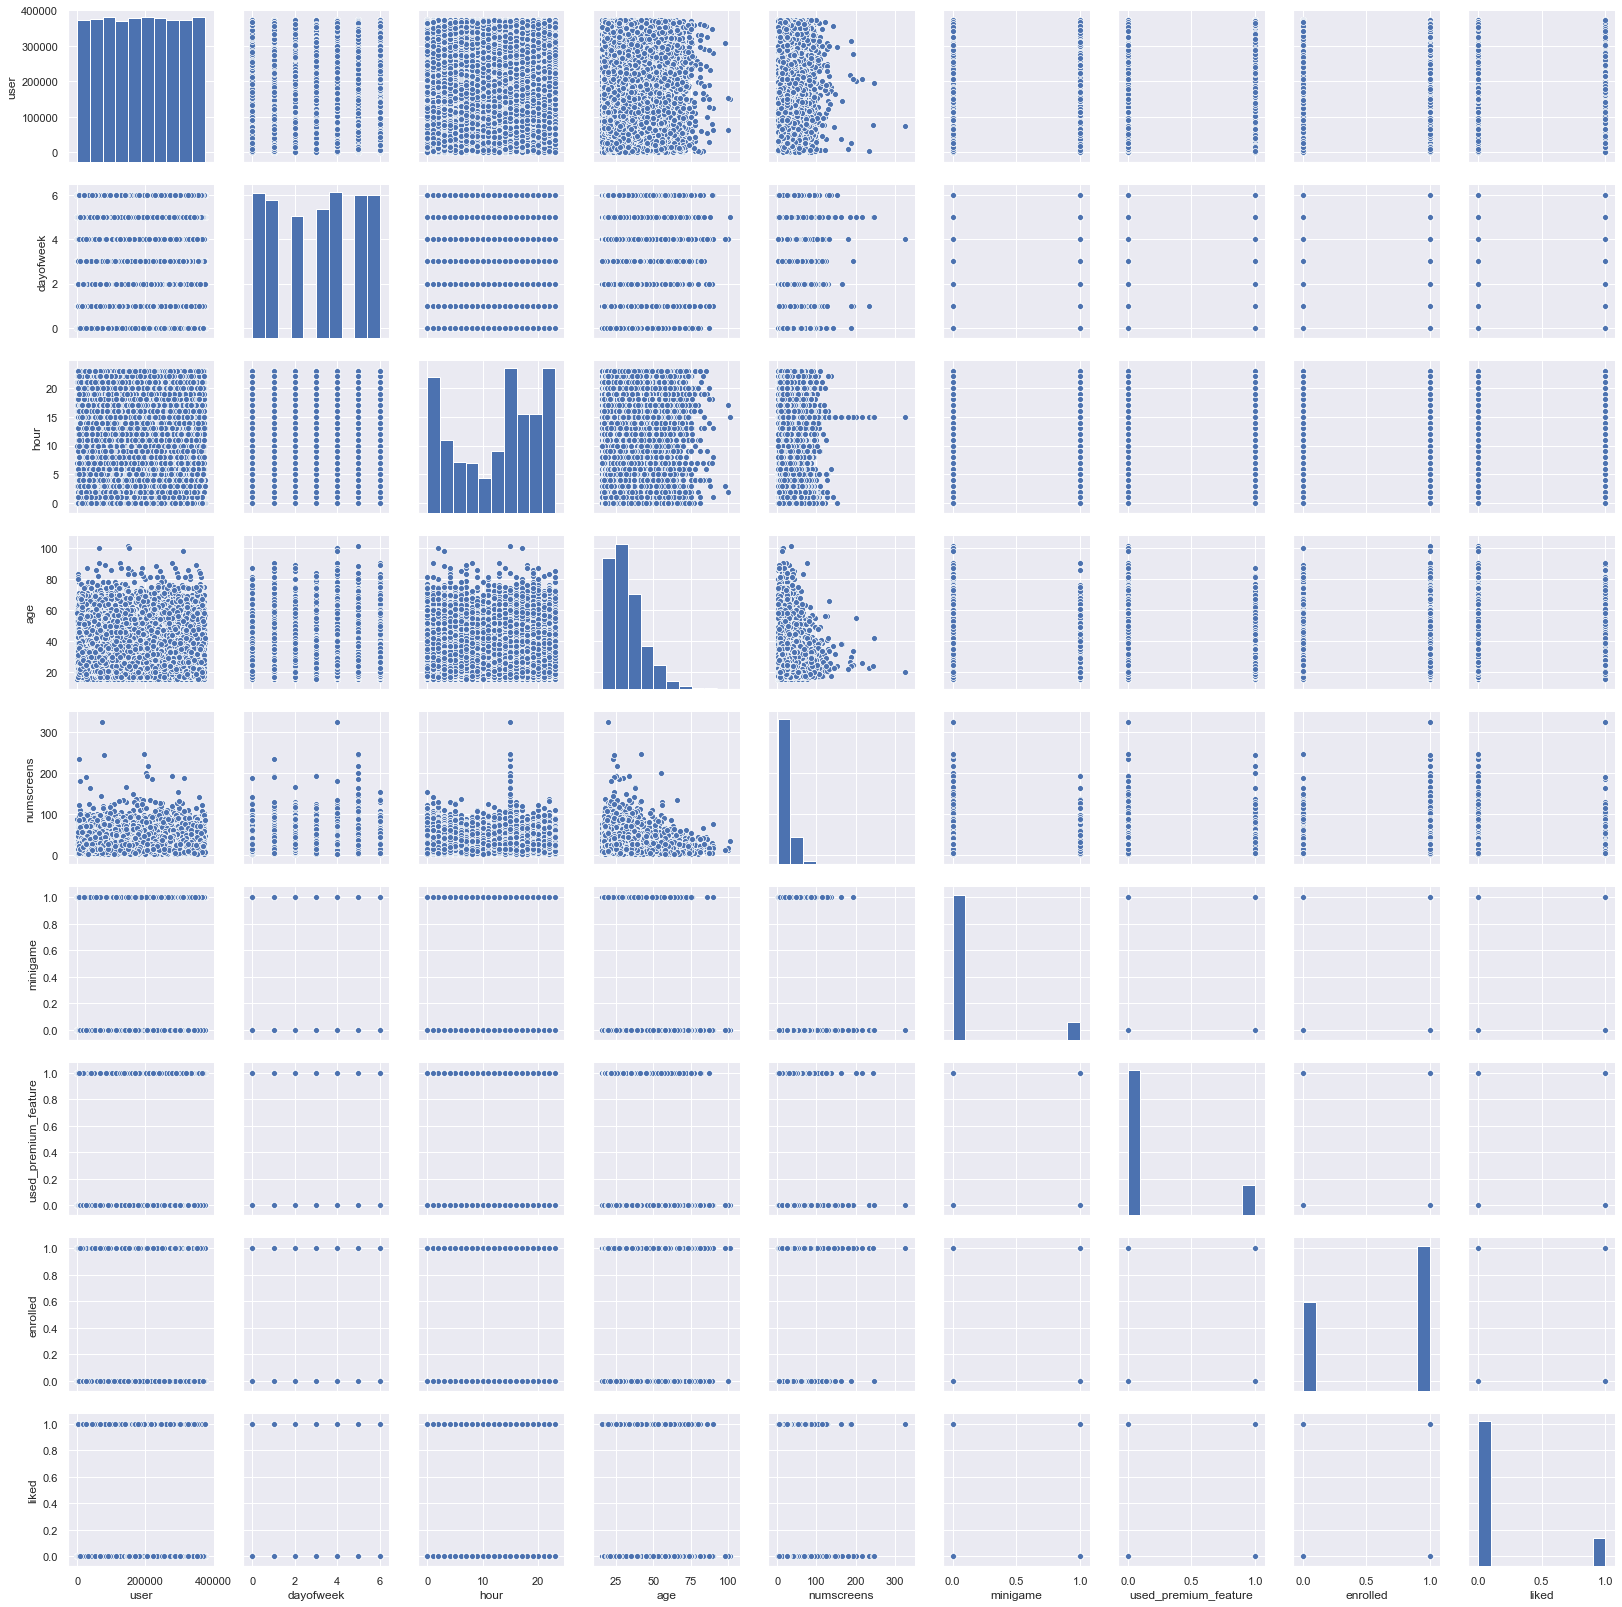

In [11]:
sns.pairplot(dataset, palette = 'coolwarm')

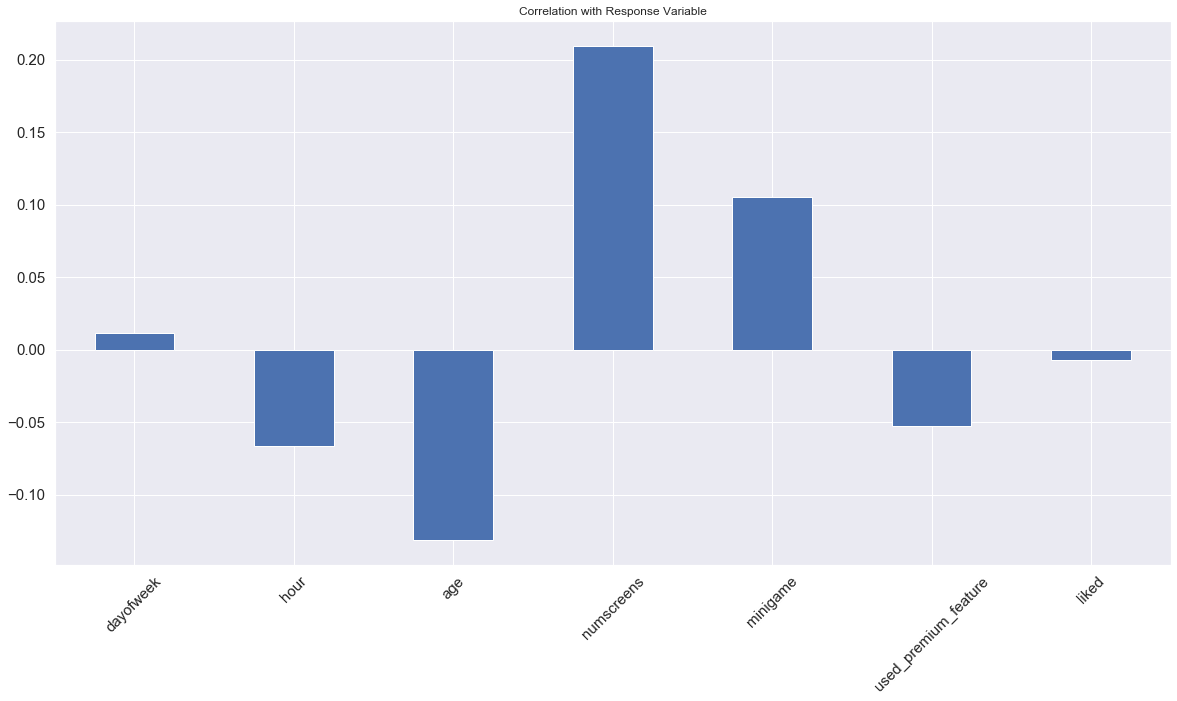

In [12]:
# Correlation with Response Variable
sns.set()
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = 'Correlation with Response Variable',
                                            fontsize = 15, rot = 45, 
                                            grid = True)

In [13]:
# Correlation Matrix
sns.set(style = "white", font_scale = 2)

In [14]:
# Compute the correlation matrix
corr = dataset2.corr()
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


In [15]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

Text(0.5, 1, 'Correlation Between Features')

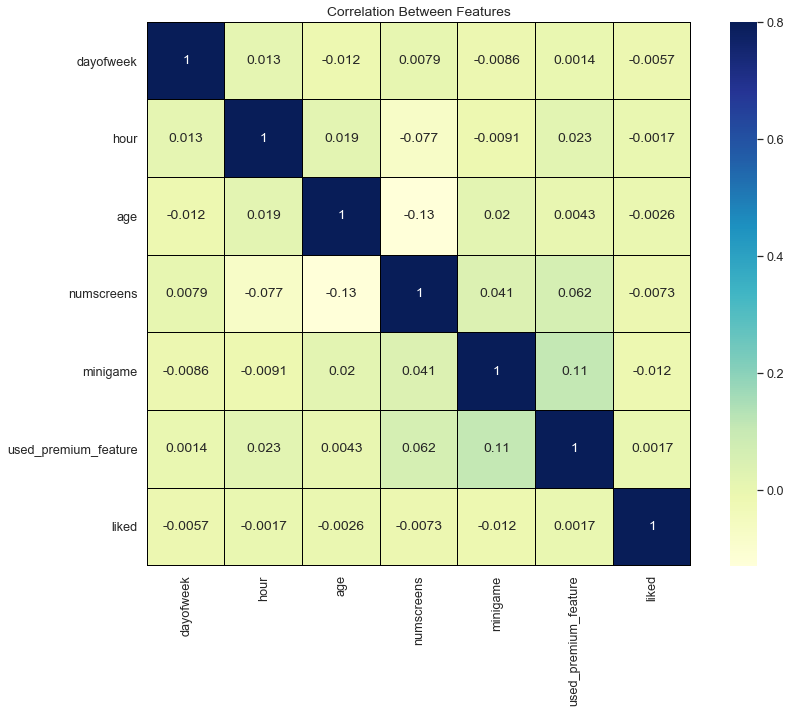

In [16]:
# Correlation matrix similiar but between each individual
corr = dataset2.corr()

sns.set(font_scale = 1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax = 0.8, linewidths = 0.01,
           square = True, annot = True, cmap='YlGnBu', linecolor = "black")
plt.title('Correlation Between Features')

In [17]:
# Feature Engineering - Time between signup and enrollment
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [18]:
# Converting into DataTime
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

In [19]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [20]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [21]:
# Calculate the time for response
sns.set()
plt.figure(figsize = (10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

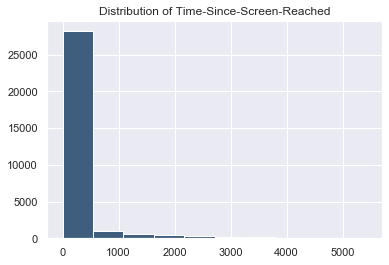

In [22]:
# Time elapsed between the first and enrolling in premium date
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

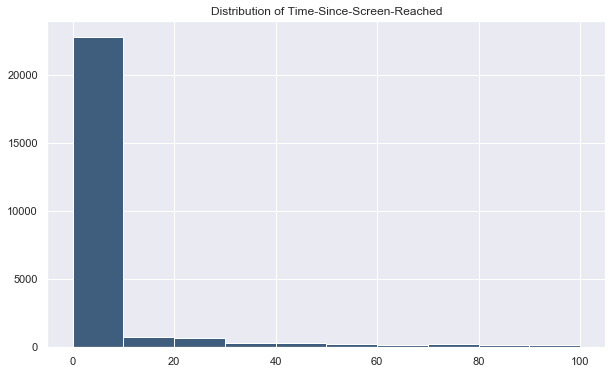

In [23]:
# Plot the histogram for first 100 hours
sns.set()
plt.figure(figsize = (10,6))
plt.hist(dataset["difference"].dropna(), color = "#3F5D7D", range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

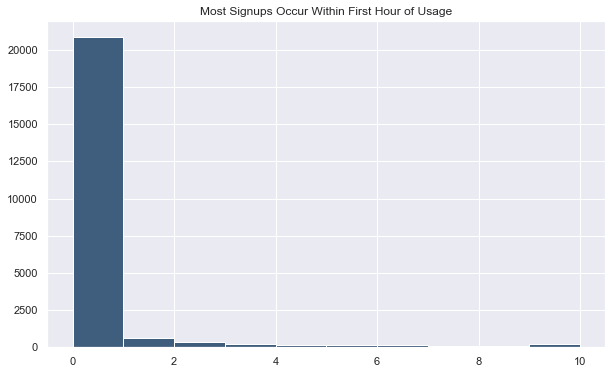

In [24]:
# Plot the histogram for first 10 hours
sns.set()
plt.figure(figsize = (10,6))
plt.hist(dataset["difference"].dropna(), color = "#3F5D7D", range = [0, 10])
plt.title('Most Signups Occur Within First Hour of Usage')
plt.show()

In [25]:
# It looks like the first hour of usuage is where most users decided whether to sign up or not.
# We notice the difference distribution tells us most enrollment in first 10 hours. Some in 20 and 30.
# We will restrict ourself to first 2 days (48 hours)

In [26]:
dataset.loc[dataset.difference > 48, 'enrolled']= 0

In [27]:
# Dropping unwanted columns
dataset = dataset.drop(columns = ['enrolled_date', 'difference', 'first_open'])

In [28]:
# Load Top Screens
# Feature engineering to Screens (which screen was visited) - to convert screens so that model can read it

In [29]:
top_screens = pd.read_csv('C:/Users/Mandar/Downloads/top_screens.csv')

In [30]:
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [31]:
top_screens = top_screens.top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [32]:
# Mapping screens to the fields 
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [33]:
# Creating new column "other" to get value of how many left over screens we have
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")    

In [34]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10


In [35]:
# Dropping the column
dataset = dataset.drop(columns=['screen_list'])

In [36]:
# Creating funnel
# Grouping related screens to the same funnel
# We can do this to remove the correlation that exists between various screens from the same funnel

In [37]:
# First the savings screens
savings_screens = [
    "Saving1",
    "Saving2",
    "Saving2Amount",
    "Saving4",
    "Saving5",
    "Saving6",
    "Saving7",
    "Saving8",
    "Saving9",
    "Saving10"]

# Creating new column, count of saving screens
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)

In [38]:
# Dropping the saving screens column
dataset = dataset.drop(columns = savings_screens)

In [39]:
# Now the credit screens
cm_screens = [
    "Credit1",
    "Credit2",
    "Credit3",
    "Credit3Container",
    "Credit3Dashboard"]

# Creating new column, count of credit screens
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)


In [40]:
# Dropping the cm screen column
dataset = dataset.drop(columns = cm_screens)

In [41]:
# Now the CC screens
cc_screens = [
    "CC1",
    "CC1Category",
    "CC3"]

# Creating new column, count of CC screens
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)

In [42]:
# Dropping the cc screens column
dataset = dataset.drop(columns = cc_screens)

In [43]:
# Lastly the loan screens
loan_screens = [
    "Loan",
    "Loan2",
    "Loan3",
    "Loan4"]

# Creating new column, count of loan screens
dataset["LoanCount"] = dataset[loan_screens].sum(axis=1)

In [44]:
# Dropping new column, count of loan screens
dataset = dataset.drop(columns = loan_screens)

In [45]:
# Saving the results
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoanCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [46]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoanCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [47]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoanCount'],
      dtype='object')

In [48]:
dataset.shape

(50000, 50)

In [49]:
# copy of dataset
df = dataset

In [50]:
# Data Preprocessing
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoanCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [51]:
import time

In [52]:
# Splitting Independent and Response Variables
X = df.drop(columns = 'enrolled')
y = df["enrolled"]

In [53]:
X.shape, y.shape

((50000, 49), (50000,))

In [54]:
# Splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5, stratify = df.enrolled)

In [55]:
# Removing Identifiers (User ID)
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])

test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

In [57]:
# Assigning the column names of scaled data to the orginial data columns
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [58]:
# Assigning the row indices of scaled data to the original data columns
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [59]:
X_train = X_train2
X_test = X_test2

In [60]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoanCount
24031,-0.998390,1.404508,-0.438777,-0.068452,-0.34805,-0.457053,-0.445173,-1.038022,1.552437,-1.045379,...,-0.120019,-0.115101,-0.117530,-0.09341,-0.085754,-0.328346,-0.260312,0.879951,-0.288893,3.258868
2300,-1.490444,-0.076487,1.135560,-0.513473,-0.34805,2.187930,-0.445173,-1.038022,1.552437,-1.045379,...,-0.120019,-0.115101,-0.117530,-0.09341,-0.085754,-1.147418,-0.260312,-0.761442,-0.288893,-1.162634
2480,-1.490444,0.731329,-0.531385,2.665246,-0.34805,2.187930,-0.445173,0.963370,1.552437,-1.045379,...,-0.120019,-0.115101,8.508495,-0.09341,-0.085754,0.490727,-0.260312,1.700647,2.977283,0.311200
14812,1.461880,1.135236,-0.346169,-0.132027,-0.34805,-0.457053,-0.445173,0.963370,1.552437,0.956591,...,-0.120019,-0.115101,-0.117530,-0.09341,-0.085754,-0.055322,-0.260312,1.700647,-0.288893,0.311200
12089,-0.998390,-1.288210,1.783816,-0.449898,-0.34805,-0.457053,-0.445173,0.963370,-0.644149,0.956591,...,-0.120019,-0.115101,-0.117530,-0.09341,-0.085754,0.217703,-0.260312,-0.761442,-0.288893,0.311200


In [61]:
X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoanCount
12419,-0.016349,-1.271899,1.508838,-1.282867,2.890422,2.218257,-0.441944,-1.028815,-0.647336,-1.071123,...,-0.120447,-0.120873,-0.112509,-0.080257,-0.093682,-1.417517,-0.257290,-0.764355,-0.287525,-1.168369
40275,1.460982,-0.336060,0.307696,-0.392544,-0.345970,-0.450804,-0.441944,0.971992,-0.647336,0.933599,...,-0.120447,-0.120873,-0.112509,-0.080257,-0.093682,0.468626,-0.257290,-0.764355,-0.287525,-1.168369
30676,-0.508793,1.000853,-0.708656,1.260915,-0.345970,-0.450804,-0.441944,0.971992,-0.647336,0.933599,...,-0.120447,-0.120873,-0.112509,-0.080257,-0.093682,2.354768,-0.257290,-0.764355,-0.287525,-1.168369
32671,-1.493680,-1.138207,0.584882,-0.392544,-0.345970,-0.450804,-0.441944,-1.028815,-0.647336,0.933599,...,-0.120447,-0.120873,-0.112509,-0.080257,-0.093682,-0.070272,-0.257290,1.707685,-0.287525,0.316972
1218,-0.508793,-1.271899,2.155607,-0.646922,-0.345970,-0.450804,-0.441944,-1.028815,-0.647336,-1.071123,...,-0.120447,-0.120873,-0.112509,-0.080257,-0.093682,-0.878619,3.312216,0.059659,-0.287525,-1.168369


In [62]:
# Model Building
# Fitting the model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# Predicting the Test Set
y_pred = classifier.predict(X_test)

In [64]:
# Evaluting the results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)

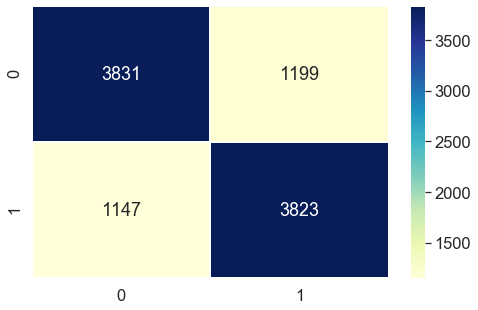

Test Data Accuracy: 0.7654


In [65]:

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,5))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, fmt='d',cmap="YlGnBu",linewidths=.9)

plt.show()
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      5030
           1       0.76      0.77      0.77      4970

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [67]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=10)

In [68]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [69]:
display_scores(scores)

Scores:  [0.7605  0.772   0.77575 0.77775 0.777   0.7615  0.75975 0.76425 0.77225
 0.7695 ]
Mean:  0.769025
Standard Deviation:  0.006652490135280195


In [70]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])], axis = 1)

,features,coef
0,dayofweek,0.027575
1,hour,-0.008175
2,age,-0.144825
3,numscreens,-0.114064
4,minigame,-0.025145
5,used_premium_feature,-0.066492
6,enrolled,0.006180
7,liked,-0.022652
8,location,-0.064469
9,Institutions,0.643939


In [71]:
# Model Tuning
# Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.01, 1, 10, 100, 1000]

# Combine parameters
parameters = dict(C=C, penalty = penalty)
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 10,
                           n_jobs = -1)

In [72]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)

In [73]:
t1 = time.time()
print("Took %0.2f seconds" % (t1-t0))
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 28.83 seconds


(0.76925, {'C': 0.01, 'penalty': 'l2'})

In [74]:
# Grid Search (Round 2)
from sklearn.model_selection import GridSearchCV

# Select regularization method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine parameters
parameters = dict(C=C, penalty = penalty)
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = "accuracy",
                          cv = 10,
                          n_jobs = -1)

In [75]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)

In [76]:
t1 = time.time()
print("Took %0.2f seconds" % (t1-t0))
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 25.78 seconds


(0.769075, {'C': 0.1, 'penalty': 'l1'})

In [77]:
# Fitting the finalized tuned model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.01, random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.7644


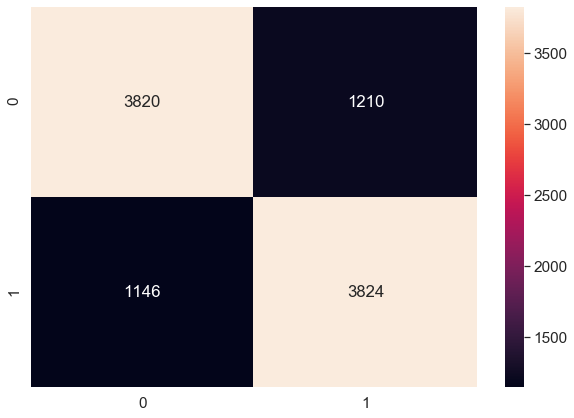

In [79]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [80]:
# Fromatting final results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()

In [81]:
final_results.head()

,enrolled,user
12419,1,38645
40275,1,112423
30676,1,42242
32671,1,66099
1218,0,292452


In [82]:
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [83]:
final_results

,user,enrolled,predicted_reach
0,38645,1,0
1,112423,1,1
2,42242,1,1
3,66099,1,1
4,292452,0,0
...,...,...,...
9995,312254,1,1
9996,91557,1,1
9997,29618,1,1
9998,234316,0,1
